## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

Mounted at /content/gdrive


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis = 1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_counts[app_type_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts[class_counts>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts<1500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_data = pd.get_dummies(application_df)
dummies_data.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = dummies_data["IS_SUCCESSFUL"]
X = dummies_data.drop(["IS_SUCCESSFUL"], axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Model 1
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# First hidden layer
dense = tf.keras.layers.Dense(input_dim= len(X_train_scaled[0]), units=80, activation="relu")
nn.add(dense)

# Second hidden layer
dense1 = tf.keras.layers.Dense(units=30, activation="relu")
nn.add(dense1)


# Output layer
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")
nn.add(dense2)

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5699 - accuracy: 0.7244
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7310
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5510 - accuracy: 0.7325
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7314
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5485 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7337
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5473 - accuracy: 0.7349
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accura

In [15]:
# @title Default title text
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5553 - accuracy: 0.7263 - 341ms/epoch - 1ms/step
Loss: 0.5552549362182617, Accuracy: 0.7262973785400391


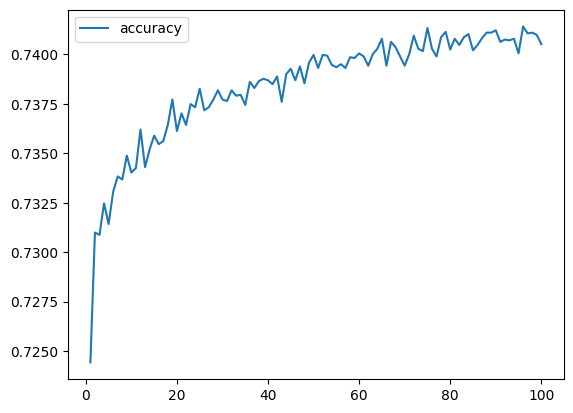

In [16]:
# Create a DataFrame containing training history
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [17]:
# Export our model to HDF5 file
nn.save("/content/gdrive/My Drive/Colab Notebooks/AlphabetSoupCharity_Optimization.h5")

In [19]:
## Second Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# First hidden layer
dense = tf.keras.layers.Dense(input_dim= len(X_train_scaled[0]), units=80, activation="tanh")
nn.add(dense)

# Second hidden layer
dense1 = tf.keras.layers.Dense(units=30, activation="tanh")
nn.add(dense1)

# Output layer
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")
nn.add(dense2)

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [21]:
 # Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5714 - accuracy: 0.7221
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5555 - accuracy: 0.7292
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7306
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7308
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7331
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5479 - accuracy: 0.7313
Epoch 7/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5481 - accuracy: 0.7326
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7341
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.7333
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5455 - accura

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5567 - accuracy: 0.7257 - 291ms/epoch - 1ms/step
Loss: 0.5566742420196533, Accuracy: 0.7257142663002014


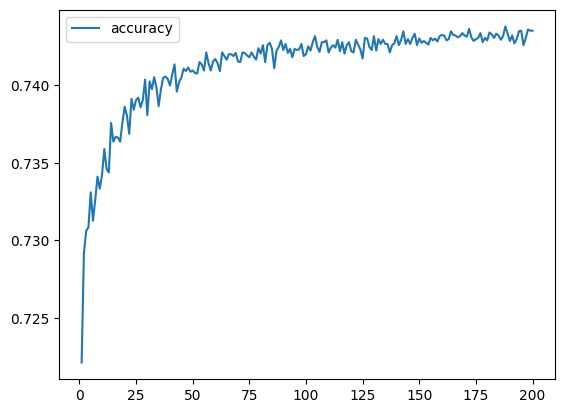

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()


In [25]:
# Save Moddel 2
nn.save('/content/gdrive/My Drive/Colab Notebooks/AlphabetSoupCharity_Optimization2.h5')

In [ ]:
## Model 3

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
dense1 = tf.keras.layers.Dense(input_dim= len(X_train_scaled[0]), units=110, activation="relu")
nn.add(dense1)

# Second hidden layer
dense2 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense2)

# Third hidden layer
dense3 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense3)

# Four hidden layer
dense4 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense4)

# Fifth hidden layer
dense5 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense5)

# Output layer
dense = tf.keras.layers.Dense(units=1, activation="sigmoid")
nn.add(dense)

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 110)               4840      
                                                                 
 dense_7 (Dense)             (None, 100)               11100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 46,341
Trainable params: 46,341
Non-trai

In [27]:
 # Compile the Sequential model together and customize metrics
 nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model

fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5704 - accuracy: 0.7217
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5569 - accuracy: 0.7300
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7325
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7328
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7322
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7343
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.7341
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7357
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.7355
Epoch 10/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accura

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6514 - accuracy: 0.7230 - 514ms/epoch - 2ms/step
Loss: 0.6513763070106506, Accuracy: 0.7230320572853088


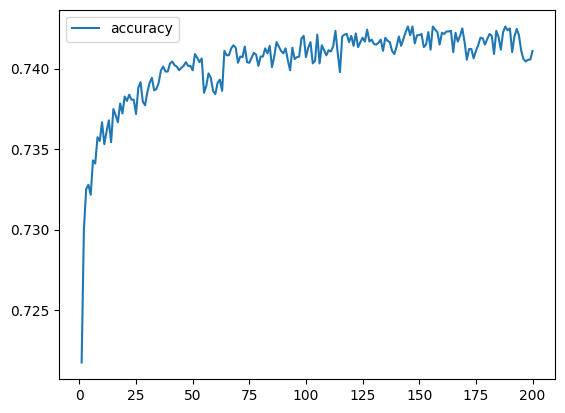

In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [32]:
# Save Model 3
nn.save('/content/gdrive/My Drive/Colab Notebooks/AlphabetSoupCharity_Optimization3.h5')